In [83]:
from numpy import loadtxt
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #not used?
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler
import datetime
import os
import matplotlib.pyplot as plt
from pylab import rcParams
import time


%matplotlib inline

In [2]:
OUTPUT_DATA_DIR = "D:/2017_working/unearthed/digital_tribes_Houston/output/"


INPUT_DATA_DIR = "D:/2017_working/unearthed/digital_tribes_Houston/"
input_file1 = "Hackathon_DataSet_OctApr_Part1.txt"
input_file2 = "Hackathon_DataSet_OctApr_Part2.txt"

In [3]:
df1 = pd.read_table(INPUT_DATA_DIR+input_file2, sep='\t', header=0)

In [4]:
print (type(df1), df1.shape)

<class 'pandas.core.frame.DataFrame'> (469441, 51)


In [5]:
df1.head(2)

,Id,hackathon4,TimeStamp,21-FQI-10518-01.NetRate.PV (BPD),21-FT-40518-03_Density_(Coriolis) (g/cc),21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d),21-HY-10535.OUT_Flowline_Lchr/Rcvr_To_Prod_Sep (%),21-HY-40534.OUT_Test_Separator_Inlet (%),21-LIC-10516.SP_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%),21-LIC-10620.CV_2nd_Stg_Hydrocyclone_Wtr_Out (%),...,30-PDT-19104-01.PV_2nd_Stg_Hydrocyclone_Out_To_Drn (PSID),30-PDT-19104-02.PV_2nd_Stg_Hydrocyclone_To_Skimmer (PSID),30-PDT-19104.PV_2nd_Stg_Hydrocyclone_Out_To_Drn_Diff_Press_Ratio (PSID),30-PDY-19104.OUT_2nd_Stg_Prod_Hydrocyclone_Out (%),30-PT-69503.PV_Flotation_Cell (PSIG),30-PT-69512.PV (psig),30-PY-69503.OUT_Flotation_Cell_Out_To_LP_Flare (%),37-PT-62301.PV_Closed_Smp_Tk_Pmp_Disch_To_Sep (PSIG),PIIntTSTicks,PIIntShapeID
0,1,hackathon4,10/20/2016 12:00:00 AM,11546.126953,0.840992,39545.699219,30.5,100.0,30.0,0.0,...,9.768112,9.703619,0.965848,42.564075,3.296184,2.667331,0.0,-1.208175,636125364000000000,0
1,2,hackathon4,10/20/2016 12:00:30 AM,12254.705078,0.840978,38541.804688,30.5,100.0,30.0,0.0,...,9.773479,9.755747,0.965457,42.561581,3.255860,2.631529,0.0,-0.869427,636125364300000000,0


In [6]:
#drop useless columns
df1.drop(labels=['Id', 'hackathon4'], axis=1, inplace=True)


In [7]:
colnames = list(df1)
colnames

['TimeStamp',
 '21-FQI-10518-01.NetRate.PV (BPD)',
 '21-FT-40518-03_Density_(Coriolis) (g/cc)',
 '21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d)',
 '21-HY-10535.OUT_Flowline_Lchr/Rcvr_To_Prod_Sep (%)',
 '21-HY-40534.OUT_Test_Separator_Inlet (%)',
 '21-LIC-10516.SP_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%)',
 '21-LIC-10620.CV_2nd_Stg_Hydrocyclone_Wtr_Out (%)',
 '21-LIC-10620.SP_2nd_Stg_Hydrocyclone_Wtr_Out (%)',
 '21-LIC-40516.SP_Test_Allocation_Sep_Interface (%)',
 '21-LT-10515.PV_Prod_Sep_Oil_Interface_Level (%)',
 '21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)',
 '21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%)',
 '21-LT-10620.PV_Prod_Sep_2nd_Stg_Interface (%)',
 '21-LT-40515.PV_Test_Allocation_Sep_Interface (%)',
 '21-LT-40516.PV_Test_Allocation_Sep_Interface (%)',
 '21-LY-10516.OUT_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%)',
 '21-LY-10616.OUT_Prod_Sep_2nd_Stg_Fluid_To_Exch (%)',
 '21-LY-10620.OUT_2nd_Stg_Hydrocyclone_Wtr_Out (%)',
 '21-LY-11516.OUT_Train_1_Treater_Wtr_Interface_Level

In [8]:
null_count = df1.isnull().sum()
print ("null_count:\n", null_count)
print ("total nulls:", null_count.sum())


null_count:
 TimeStamp                                                                  0
21-FQI-10518-01.NetRate.PV (BPD)                                           0
21-FT-40518-03_Density_(Coriolis) (g/cc)                                   0
21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d)                   0
21-HY-10535.OUT_Flowline_Lchr/Rcvr_To_Prod_Sep (%)                         0
21-HY-40534.OUT_Test_Separator_Inlet (%)                                   0
21-LIC-10516.SP_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%)                        0
21-LIC-10620.CV_2nd_Stg_Hydrocyclone_Wtr_Out (%)                           0
21-LIC-10620.SP_2nd_Stg_Hydrocyclone_Wtr_Out (%)                           0
21-LIC-40516.SP_Test_Allocation_Sep_Interface (%)                          0
21-LT-10515.PV_Prod_Sep_Oil_Interface_Level (%)                            0
21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)                            0
21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%)                  

In [9]:
scaler = MinMaxScaler()
scaler.fit(df1.drop('TimeStamp', axis=1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
print(scaler.data_max_)

[  6.66650625e+04   1.01531756e+00   6.61894219e+04   1.00000000e+02
   1.00000000e+02   3.80000000e+01   9.90348358e+01   3.60000000e+01
   4.29518929e+01   3.37044029e+01   5.62449341e+01   3.64300957e+01
   3.78628235e+01   3.79433136e+01   9.05934677e+01   1.00000000e+02
   8.77980804e+01   1.00000000e+02   1.00000000e+02   9.99838562e+01
   2.58994171e+02   9.66163864e+01   3.35658356e+02   8.51994934e+01
   1.33930298e+02   3.61046722e+02   2.57655371e+04   1.29114766e+04
   1.30321758e+04   3.86455078e+04   1.00000000e+02   1.00000000e+02
   1.03639557e+02   1.01777435e+02   1.00011322e+02   9.79960632e+01
   1.00000000e+02   2.31133628e+00   5.22168121e+01   5.89051323e+01
   1.98852715e+04   1.00000000e+02   6.08647079e+01   9.64643707e+01
   1.00000000e+02   1.78930649e+02   6.36266196e+17   0.00000000e+00]


In [11]:
scaled_df1 = scaler.transform(df1.drop('TimeStamp', axis=1))

['21-FQI-10518-01.NetRate.PV (BPD)', '21-FT-40518-03_Density_(Coriolis) (g/cc)', '21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d)', '21-HY-10535.OUT_Flowline_Lchr/Rcvr_To_Prod_Sep (%)', '21-HY-40534.OUT_Test_Separator_Inlet (%)']


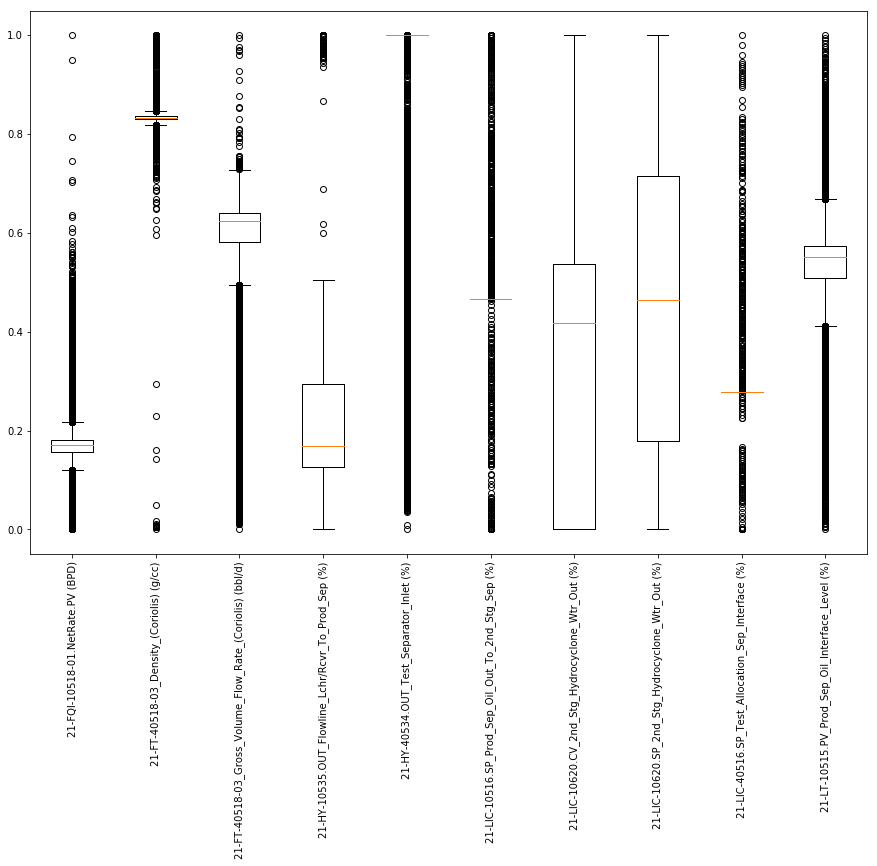

In [19]:
# basic plot
print (colnames[1:6])
plt.boxplot(scaled_df1[:, 0:10], labels=colnames[1:11])
plt.xticks(rotation=90)
rcParams['figure.figsize'] = 15, 10
plt.show()

21-PT-10505.PV_Production_Separator (PSIG)  
21-PT-40505.PV_Test_Allocation_Separator (PSIG)   
21-HY-40534.OUT_Test_Separator_Inlet (%)

Background – Separation Upset Dates 
October 26, 2016
November 11, 2016
November 16, 2016
November 27, 2016
January 28, 2017 
March 12, 2017


flowrate typ 3-4 ft/s ? check

In [20]:
df1.dtypes

TimeStamp                                                                   object
21-FQI-10518-01.NetRate.PV (BPD)                                           float64
21-FT-40518-03_Density_(Coriolis) (g/cc)                                   float64
21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d)                   float64
21-HY-10535.OUT_Flowline_Lchr/Rcvr_To_Prod_Sep (%)                         float64
21-HY-40534.OUT_Test_Separator_Inlet (%)                                   float64
21-LIC-10516.SP_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%)                        float64
21-LIC-10620.CV_2nd_Stg_Hydrocyclone_Wtr_Out (%)                           float64
21-LIC-10620.SP_2nd_Stg_Hydrocyclone_Wtr_Out (%)                           float64
21-LIC-40516.SP_Test_Allocation_Sep_Interface (%)                          float64
21-LT-10515.PV_Prod_Sep_Oil_Interface_Level (%)                            float64
21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)                            float64
21-L

In [22]:
df1['TimeStamp'].iloc[0], type(df1['TimeStamp'].iloc[0])

('10/20/2016 12:00:00 AM', str)

In [50]:
import datetime
print (datetime.datetime.strptime('10/20/2016 12:04:05 AM', "%m/%d/%Y %I:%M:%S %p"))


2016-10-20 00:04:05


In [53]:
df1['TimeStamp_'] = pd.to_datetime(df1['TimeStamp'])

In [54]:
df1.dtypes

TimeStamp                                                                          object
21-FQI-10518-01.NetRate.PV (BPD)                                                  float64
21-FT-40518-03_Density_(Coriolis) (g/cc)                                          float64
21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d)                          float64
21-HY-10535.OUT_Flowline_Lchr/Rcvr_To_Prod_Sep (%)                                float64
21-HY-40534.OUT_Test_Separator_Inlet (%)                                          float64
21-LIC-10516.SP_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%)                               float64
21-LIC-10620.CV_2nd_Stg_Hydrocyclone_Wtr_Out (%)                                  float64
21-LIC-10620.SP_2nd_Stg_Hydrocyclone_Wtr_Out (%)                                  float64
21-LIC-40516.SP_Test_Allocation_Sep_Interface (%)                                 float64
21-LT-10515.PV_Prod_Sep_Oil_Interface_Level (%)                                   float64
21-LT-1051

In [56]:
type(df1['TimeStamp_'].iloc[0]), df1['TimeStamp_'].iloc[0]

(pandas._libs.tslib.Timestamp, Timestamp('2016-10-20 00:00:00'))

In [57]:
#Background – Separation Upset Dates 
#October 26, 2016
start_date = '2016-10-25'
end_date = '2016-10-27'

In [60]:
mask = (df1['TimeStamp_'] > start_date) & (df1['TimeStamp_'] <= end_date)

In [61]:
df_incident = df1.loc[mask]
df_incident.shape

(5760, 50)

In [69]:
list(df_incident)

['TimeStamp',
 '21-FQI-10518-01.NetRate.PV (BPD)',
 '21-FT-40518-03_Density_(Coriolis) (g/cc)',
 '21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d)',
 '21-HY-10535.OUT_Flowline_Lchr/Rcvr_To_Prod_Sep (%)',
 '21-HY-40534.OUT_Test_Separator_Inlet (%)',
 '21-LIC-10516.SP_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%)',
 '21-LIC-10620.CV_2nd_Stg_Hydrocyclone_Wtr_Out (%)',
 '21-LIC-10620.SP_2nd_Stg_Hydrocyclone_Wtr_Out (%)',
 '21-LIC-40516.SP_Test_Allocation_Sep_Interface (%)',
 '21-LT-10515.PV_Prod_Sep_Oil_Interface_Level (%)',
 '21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)',
 '21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%)',
 '21-LT-10620.PV_Prod_Sep_2nd_Stg_Interface (%)',
 '21-LT-40515.PV_Test_Allocation_Sep_Interface (%)',
 '21-LT-40516.PV_Test_Allocation_Sep_Interface (%)',
 '21-LY-10516.OUT_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%)',
 '21-LY-10616.OUT_Prod_Sep_2nd_Stg_Fluid_To_Exch (%)',
 '21-LY-10620.OUT_2nd_Stg_Hydrocyclone_Wtr_Out (%)',
 '21-LY-11516.OUT_Train_1_Treater_Wtr_Interface_Level

In [62]:
cols_to_show = ['21-PT-10505.PV_Production_Separator (PSIG)', 
                '21-PT-40505.PV_Test_Allocation_Separator (PSIG)', 
                '21-HY-40534.OUT_Test_Separator_Inlet (%)']


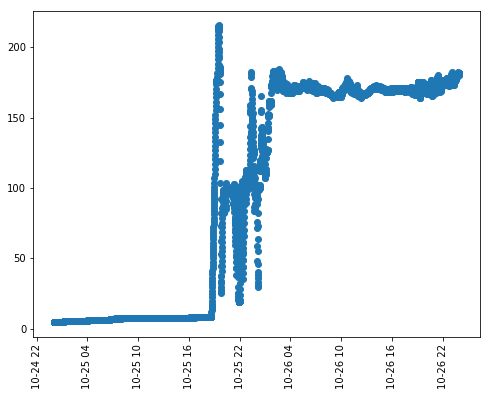

In [98]:
#plt.boxplot(df_incident['21-PT-10505.PV_Production_Separator (PSIG)'].values)
rcParams['figure.figsize'] = 8, 6
plt.plot_date(df_incident['TimeStamp_'], df_incident[cols_to_show[0]])
plt.xticks(rotation=90)
plt.show()

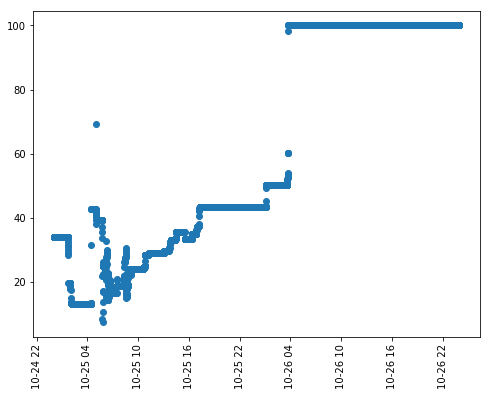

In [96]:
#plt.boxplot(df_incident['21-PT-10505.PV_Production_Separator (PSIG)'].values)
rcParams['figure.figsize'] = 8, 6
plt.plot_date(df_incident['TimeStamp_'], df_incident[cols_to_show[1]])
plt.xticks(rotation=90)
plt.show()

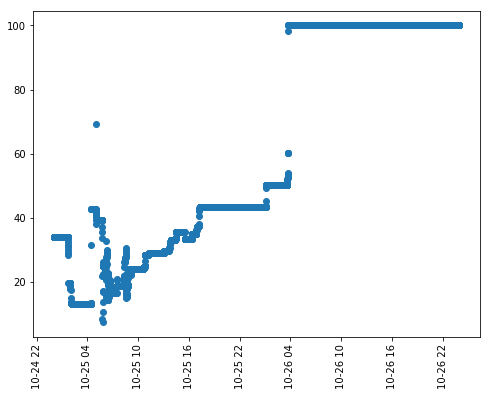

In [97]:
rcParams['figure.figsize'] = 8, 6
plt.plot_date(df_incident['TimeStamp_'], df_incident[cols_to_show[2]])
plt.xticks(rotation=90)
plt.show()